In [48]:
import tensorflow as tf
import keras
import numpy as np
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
(train_images, train_labels) , (test_images, test_labels) = fashion_mnist.load_data()

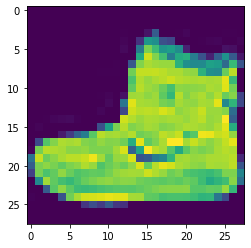

In [53]:
plt.imshow(train_images[0])

In [54]:
train_images[0].shape

(28, 28)

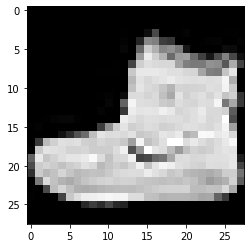

In [55]:
arr = np.zeros(shape=(28,28,3))
arr[:,:,0] = train_images[0]
arr[:,:,1] = train_images[0]
arr[:,:,2] = train_images[0]
plt.imshow(arr.astype('uint8'))

In [56]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [57]:
train_images = train_images/255
test_images = test_images/255

In [59]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy')

In [60]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.4967
Epoch 2/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.3699
Epoch 3/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.3316
Epoch 4/10
60000/60000 [==============================] - 25s 414us/step - loss: 0.3092
Epoch 5/10
60000/60000 [==============================] - 28s 471us/step - loss: 0.2941
Epoch 6/10
60000/60000 [==============================] - 28s 468us/step - loss: 0.2769
Epoch 7/10
60000/60000 [==============================] - 28s 468us/step - loss: 0.2659
Epoch 8/10
60000/60000 [==============================] - 27s 454us/step - loss: 0.2555
Epoch 9/10
60000/60000 [==============================] - 25s 416us/step - loss: 0.2465
Epoch 10/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.2387


In [61]:
res = model.predict(test_images)

In [63]:
res.shape

(10000, 10)

In [64]:
res_2 = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 195us/step


In [65]:
res_2

0.34774855105876923

In [66]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0
Epoch 1/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1849
Epoch 2/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0788
Epoch 3/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0545
Epoch 4/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0420
Epoch 5/5
313/313 [==============================] - 9s 30ms/step - loss: 0.0682
[3.7396544e-09 2.4497785e-07 4.3094565e-06 2.6901797e-04 1.4114350e-09
 1.2755669e-07 4.2982792e-12 9.9949789e-01 2.4785282e-07 2.2822377e-04]
7


In [67]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


2.2.0
Epoch 1/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.4728
Epoch 2/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.3577
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 68s 36ms/step - loss: 0.3577


In [68]:
tf.nn.relu?

In [69]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.4745 - accuracy: 0.8295
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 68s 36ms/step - loss: 0.4745 - accuracy: 0.8295
